<a href="https://colab.research.google.com/github/gyuah/-A-/blob/master/lab01_201900557_%EA%B9%80%EA%B7%9C%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2-1 Data Manipulation

In [1]:
import torch

In [2]:
x=torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel()

12

In [5]:
X=x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(3,4) #N(0,1)을 따르는 number를 random하게 3x4 배열로 생성

tensor([[ 0.0385,  2.1766,  1.2666,  1.7121],
        [-0.2930, -0.3802,  0.2057, -0.4963],
        [-1.1004,  1.2340,  0.5921,  2.2161]])

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [11]:
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])
x+y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [12]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [14]:
X=torch.arange(12,dtype=torch.float32).reshape((3,4))
Y=torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [15]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [16]:
X.sum()

tensor(66.)

In [17]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [18]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [19]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]), tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [20]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [22]:
before = id(Y) #id():메모리 상의 저장된 주소를 제공하는 function
Y = Y + X
id(Y) == before

False

In [24]:
Z = torch.zeros_like(Y) #zeros_like():()와 같은 shape matrix를 생성하고 모두 0대입
print('id(Z):', id(Z))
Z[:] = X + Y #기존 저장 주소에 새로운 값을 가지는 Z 
print('id(Z):', id(Z))

id(Z): 139788618483584
id(Z): 139788618483584


In [26]:
before = id(X)
X += Y #or X[:]=X+Y
id(X) == before

True

In [27]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [28]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

torch에서는 data를 tensor에 담는다. 
arange나 reshape 등의 함수를 사용하여 tensor를 생성하고 재구성할 수 있다.
변수의 값을 update하고 싶을 때는 메모리가 낭비되지 않도록 주의한다.

#2-2 Data Preprocessing

In [30]:
import os

os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file=os.path.join('..','data','house_tiny.csv')
with open(data_file,'w') as f :
  f.write('NumRooms,Alley,Price\n')  
  f.write('NA,Pave,127500\n') 
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [31]:
import pandas as pd #read_csv function을 사용하기 위해 import

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [32]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
#NumRooms와 Alley를 input으로, Price를 output으로 지정
inputs = inputs.fillna(inputs.mean()) 
#NumRooms의 NaN 값을 다른 값들의 평균으로 대체
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [33]:
inputs = pd.get_dummies(inputs, dummy_na=True)
#Alley column을 Pave와 nan 값을 기준으로 column 2개로 대체
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [34]:
#input, output 값들을 모두 숫자 형식으로 바꿨으니 tensor 형식으로 변환
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

csv형식의 파일을 생성하고 pandas에 포함된 function을 사용하여 파일을 읽는다. data file에서 numerical하지 않은 data를 preprocessing하여 모두 numerical하게 만들고
이를 tensor 형식으로 옮긴다. 

#2.3 Linear Algebra

In [35]:
import torch

x = torch.tensor([3.0]) #scalar 생성
y = torch.tensor([2.0])

x + y, x * y, x / y, x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [36]:
x = torch.arange(4) #vector 생성
x

tensor([0, 1, 2, 3])

In [39]:
x[3]

tensor(3)

In [40]:
len(x)

4

In [41]:
x.shape

torch.Size([4])

In [43]:
A=torch.arange(20).reshape(5,4) #matrix
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [45]:
A.T #transpose

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [47]:
B=torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [49]:
B==B.T #B와 B의 transpose를 비교

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [50]:
X = torch.arange(24).reshape(2, 3, 4) #tensor:n-dimensional arrays
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [51]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [52]:
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [54]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape #tensor에 scalar를 더해도 shape이 변하지 않는다

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

In [55]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [56]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [57]:
A_sum_axis0 = A.sum(axis=0) #row 기준으로 더함
A_sum_axis0, A_sum_axis0.shape #shape이 달라짐

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [58]:
A_sum_axis1 = A.sum(axis=1) #column 기준으로 더함
A_sum_axis1, A_sum_axis1.shape #shape이 달라짐

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [59]:
A.sum(axis=[0, 1])  # row와 column 모두를 더한다. A.sum과 동일

tensor(190.)

In [60]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [61]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [62]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [63]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [65]:
A.cumsum(axis=0) #row 기준으로 축적되는 sum

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [66]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y) #x,y dot product

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [68]:
torch.sum(x * y) #==torch.dot(x,y)

tensor(6.)

In [69]:
A.shape, x.shape, torch.mv(A, x) #matrix-vector product

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [70]:
B = torch.ones(4, 3)
torch.mm(A, B) #matrix-matrix product

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [71]:
u = torch.tensor([3.0, -4.0])
torch.norm(u) #L2 norm

tensor(5.)

In [72]:
torch.abs(u).sum() #L1 norm

tensor(7.)

In [74]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

scalar,vector, matrix 간의 연산을 해봤다. sum,mean,dot product,norm 등의 연산을 통해 tensor의 연산에 익숙해질 수 있었다.

#2.5 Calculus

In [75]:
!pip install d2l==0.16.1

     |████████████████████████████████| 81kB 4.9MB/s 


In [76]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
import numpy as np

def f(x): #함수 선언
    return 3 * x ** 2 - 4 * x

In [77]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

#x=1일 때, h가 0에 가까워질수록 f(x)함수 값이 2에 가까워진다. f(x)의 
#x=1일 때와 같은 값. 
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [78]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')
#추후에 재정의 하지 않아도 호출 가능

In [79]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [80]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [81]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

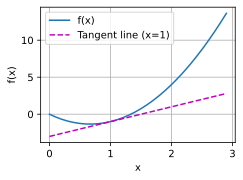

In [82]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

#2.5 Automatic Differentiation

In [83]:
import torch

In [93]:
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [94]:
x.requires_grad_(True) #이 tensor에서 이뤄지는 모든 연산을 추적함
x.grad 

In [95]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [96]:
y.backward() #자동 미분 수행
x.grad

tensor([ 0.,  4.,  8., 12.])

In [97]:
x.grad==4*x

tensor([True, True, True, True])

In [98]:
x.grad.zero_() #초기화
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [99]:
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [100]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [101]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [102]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [103]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [104]:
a.grad == d / a

tensor(True)

#2.6 Probability

In [2]:
!pip install d2l==0.16.2

     |████████████████████████████████| 81kB 3.4MB/s 


In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [4]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [7]:
multinomial.Multinomial(10, fair_probs).sample()
#fait_probs의 probability를 가질 때 각 숫자(1~6)이 몇번 나왔는지

tensor([1., 3., 2., 0., 4., 0.])

In [9]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 1000번의 시도에서 상대적 빈도를 측정 1/6=0.167

tensor([0.1570, 0.1650, 0.1530, 0.1670, 0.1730, 0.1850])

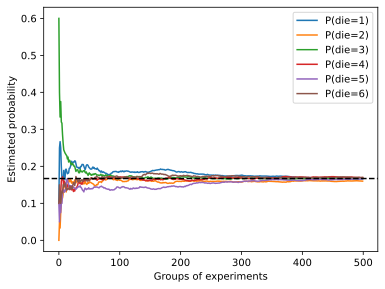

In [10]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) 
#10개의 sample을 가지는 500개의 group
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
#plot의 구체적인 설정 정하기
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

random한 value의 발생 확률을 정하고, 시행을 수차례 반복했을 때 
나타나는 probability를 plot하여 한눈에 probability를 관찰한다.
machine learning에서 probability가 큰 쪽의 parameter를 update하는데, 
이때 기본이 되는 probability에 대해 배웠다.